In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price/NFLX.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-stock-price/NFLX.csv')

In [3]:
df.head

<bound method NDFrame.head of             Date        Open        High         Low       Close   Adj Close  \
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...          ...         ...         ...         ...         ...         ...   
5417  2023-11-29  479.000000  480.989990  474.489990  477.190002  477.190002   
5418  2023-11-30  475.309998  478.589996  470.420013  473.970001  473.970001   
5419  2023-12-01  473.170013  475.230011  464.600006  465.739990  465.739990   
5420  2023-12-04  460.989990  461.200012  451.200012  453.899994  453.899994   
5421  2023-12-05  450.700012  456.390015  449.579987  455.149994  455.149994   

         

In [4]:
info_summary = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5422 non-null   object 
 1   Open       5422 non-null   float64
 2   High       5422 non-null   float64
 3   Low        5422 non-null   float64
 4   Close      5422 non-null   float64
 5   Adj Close  5422 non-null   float64
 6   Volume     5422 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 296.6+ KB


<Axes: >

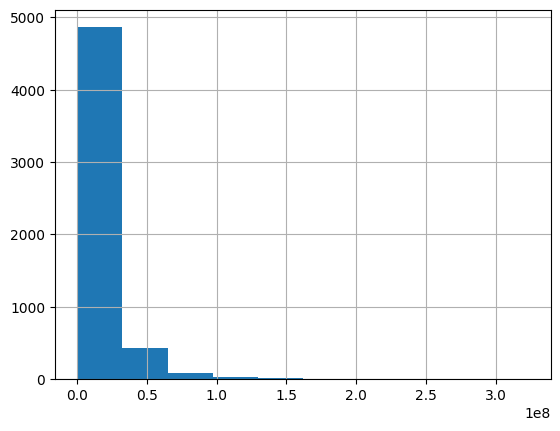

In [5]:
df['Volume'].hist()

<Axes: >

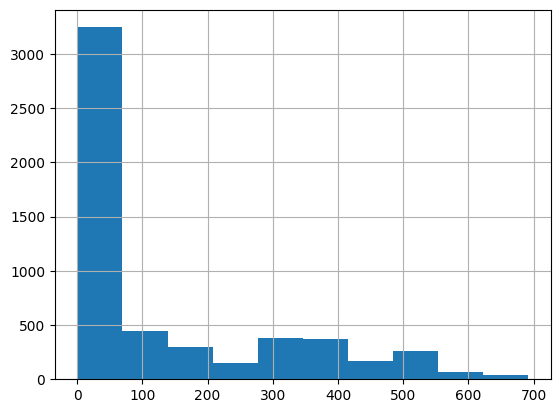

In [6]:
df['Close'].hist()

In [7]:
null_values= df.isnull().sum()
print(null_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# Setting date column 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [9]:
info_summary = df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5422 entries, 2002-05-23 to 2023-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5422 non-null   float64
 1   High       5422 non-null   float64
 2   Low        5422 non-null   float64
 3   Close      5422 non-null   float64
 4   Adj Close  5422 non-null   float64
 5   Volume     5422 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 296.5 KB


In [10]:
# adding day of the week as a feature for feature engineering
df['DayofWeek'] = df.index.dayofweek

In [11]:
#Train test split

